In [2]:
from google.protobuf.internal.well_known_types import Timestamp
from sunpy.net import Fido
from sunpy.net import attrs as a
import pandas as pd

/home/griffingoodwin/.conda/envs/2025-HL-Flaring-MEGS-AI-Updated/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [3]:
event_type = "FL"
tstart = "2010/01/01"
tend = "2025/7/01"
result = Fido.search(a.Time(tstart, tend),
                     a.hek.EventType(event_type),
                     a.hek.FL.GOESCls >= "M1.0",
                     a.hek.OBS.Observatory == "GOES")

In [4]:
hek_results = result["hek"]

In [7]:
print(hek_results['hgc_coord'])

      hgc_coord      
---------------------
   POINT(148.69204 0)
    POINT(144.6688 0)
  POINT(51.98143 -24)
  POINT(50.46024 -24)
   POINT(136.77781 0)
  POINT(51.90091 -26)
 POINT(-108.44932 21)
   POINT(-92.94885 0)
 POINT(-105.59132 21)
  POINT(-111.64737 0)
                  ...
POINT(122.487279 -14)
     POINT(53.9522 0)
    POINT(49.97202 0)
  POINT(34.245325 19)
   POINT(41.404952 0)
   POINT(40.209971 0)
   POINT(38.408308 0)
    POINT(21.35678 0)
   POINT(32.55938 19)
   POINT(-15.99142 0)
Length = 2504 rows


In [9]:
filtered_results = hek_results["event_starttime", "event_peaktime",
                               "event_endtime", "fl_goescls", "ar_noaanum", "hgc_coord"]

In [10]:
flare_df = filtered_results.to_pandas()
flare_df

,event_starttime,event_peaktime,event_endtime,fl_goescls,ar_noaanum,hpc_coord
0,2010-01-19 13:03:00,2010-01-19 13:41:00,2010-01-19 13:50:00,M2.3,11041,POINT(0 84.9696)
1,2010-01-19 20:23:00,2010-01-19 20:35:00,2010-01-19 20:46:00,M1.7,11041,POINT(0 85.4532)
2,2010-01-20 06:45:00,2010-01-20 07:27:00,2010-01-20 07:34:00,M1.0,11041,POINT(-889.41 -390.8976)
3,2010-01-20 07:42:00,2010-01-20 07:49:00,2010-01-20 07:53:00,M1.6,11041,POINT(-890.016 -392.229)
4,2010-01-20 10:46:00,2010-01-20 10:59:00,2010-01-20 11:10:00,M1.8,11041,POINT(0 86.3946)
...,...,...,...,...,...,...
2499,2025-06-16 11:27:00,2025-06-16 11:39:00,2025-06-16 11:43:00,M1.4,0,POINT(0 -19.664286)
2500,2025-06-16 14:43:00,2025-06-16 14:55:00,2025-06-16 15:03:00,M1.1,0,POINT(0 -19.9317822)
2501,2025-06-17 21:38:00,2025-06-17 21:49:00,2025-06-17 21:54:00,X1.2,14114,POINT(0 -22.457772)
2502,2025-06-20 00:02:00,2025-06-20 00:04:00,2025-06-20 00:06:00,M4.6,14114,POINT(563.482404 288.697182)


In [22]:
# Summarize flare events
print(f"Total number of flares: {len(flare_df)}")

# Count flares by GOES class
goes_class_counts = flare_df['fl_goescls'].str[0].value_counts()
print("\nFlares by GOES class:")
print(goes_class_counts)

# Get time span
time_span = pd.to_datetime(flare_df['event_starttime'])
print(f"\nTime span: {time_span.min()} to {time_span.max()}")

# Count flares per year
flares_by_year = flare_df['event_starttime'].dt.year.value_counts().sort_index()
print("\nFlares per year:")
print(flares_by_year)

# Show most active regions
active_regions = flare_df['ar_noaanum'].value_counts().head()
print("\nMost active regions (top 5):")
print(active_regions)


Total number of flares: 2504

Flares by GOES class:
fl_goescls
M    2366
X     137
S       1
Name: count, dtype: int64

Time span: 2010-01-19 13:03:00 to 2025-06-20 17:21:00

Flares per year:
event_starttime
2010     24
2011    120
2012    136
2013    111
2014    226
2015    132
2016     16
2017     43
2020      2
2021     31
2022    196
2023    334
2024    950
2025    183
Name: count, dtype: int64

Most active regions (top 5):
ar_noaanum
0        588
13664     64
13615     42
13663     40
12192     38
Name: count, dtype: int64


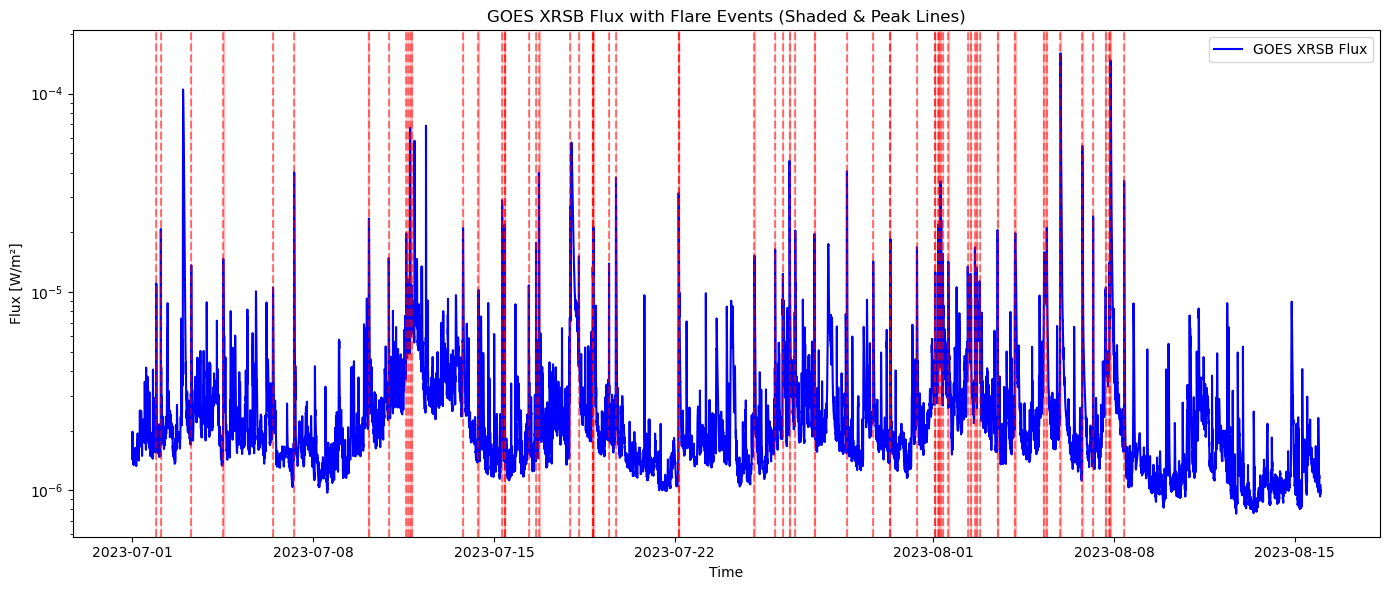

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load GOES data
goes_combined = pd.read_csv('/home/griffingoodwin/downloads/goes_combined/combined_g18_avg1m_20230701_20230815.csv')
goes_combined['time'] = pd.to_datetime(goes_combined['time'], errors='coerce')

# Load flare catalog
#flare_df = pd.read_csv('/path/to/flare_catalog.csv')  # <-- Replace with actual path
flare_df['event_starttime'] = pd.to_datetime(flare_df['event_starttime'], errors='coerce')
flare_df['event_peaktime'] = pd.to_datetime(flare_df['event_peaktime'], errors='coerce')
flare_df['event_endtime'] = pd.to_datetime(flare_df['event_endtime'], errors='coerce')

# Plot GOES flux
plt.figure(figsize=(14, 6))
plt.plot(goes_combined['time'], goes_combined['xrsb_flux'], label='GOES XRSB Flux', color='blue')

# Overlay flares

for _, flare in flare_df.iterrows():
    start = flare['event_starttime']
    peak = flare['event_peaktime']
    end = flare['event_endtime']

    if peak > pd.Timestamp("2023-08-15") or peak < pd.Timestamp("2023-07-01"):
        continue

    if pd.notna(start) and pd.notna(end) and start < end:
        plt.axvspan(start.to_pydatetime(), end.to_pydatetime(), color='red', alpha=0.2)

    if pd.notna(peak):
        plt.axvline(peak.to_pydatetime(), color='red', linestyle='--', alpha=0.5)

# Final plot settings
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Flux [W/m²]')
plt.title('GOES XRSB Flux with Flare Events (Shaded & Peak Lines)')
plt.legend()
plt.tight_layout()
plt.show()
